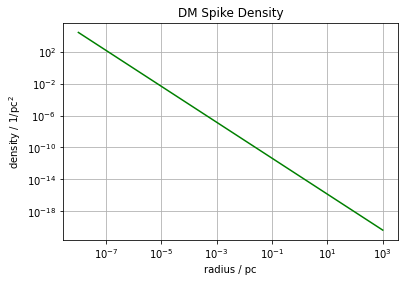

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d



π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds



# Definition of the binary system 
m1 =  1 * ms.solar_mass_to_pc   # The central mass m1 with a mass of 1 solar masses, converted to pc

m2 = 1e-3 * ms.solar_mass_to_pc   # The secondary mass of 1e-3 solar mass converted to pc

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc



ρ_bar = (ρ_eq/2)*(t_eq**(3/2))*((2*G* (m1/ms.solar_mass_to_pc))**(3/4))



# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 1  # in parsecs, Choosen by choice

alpha = 9/4

rho_spike =  ρ_bar * (r_spike**(-9/4)) * ms.solar_mass_to_pc  # This takes the value of M_sun/pc^3 and converts it to 1/pc^2

spike = imripy.halo.Spike(rho_spike, r_spike, alpha)




# Plot density
r_grid = np.geomspace(1e-8, 1e3, 100)  # creates a grid in pc
plt.loglog(r_grid, spike.density(r_grid), 'g')
plt.grid()
plt.xlabel("radius / pc")
plt.ylabel("density / 1/pc$^2$")
plt.title('DM Spike Density')
plt.savefig('spike density.pdf')
plt.show()

Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.8  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.0824s
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.89  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.2351s
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.1951s
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4497s
Evolving from  150.0  to  1.0 r_isco  with initial eccentricity 0.8  with  Options: accretion = False, haloPhaseSpaceDescription = False, accu

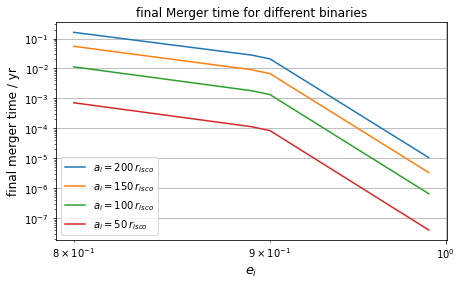

In [10]:
sp = ms.SystemProp(m1, m2, spike, D_luminosity)   # Create the SystemProp object describing the IMRI system

# Setting initial and final conditions of the binary evolution for an eccentric orbit

a0_list = [200, 150, 100, 50]             

e0_list = [0.80, 0.89, 0.90, 0.99 ] 

a_fin = sp.r_isco()      # Choosen equal to r_icso

R_fin = sp.r_isco()      # The final condition for the evolution


plt.figure(figsize=(7,4))
t_m_list= np.zeros(len(e0_list))

for i, a0 in enumerate (a0_list):
    for k, e0 in enumerate (e0_list):
        a0 = a0_list[i] * sp.r_isco()
        e_0 = e0_list[k] 
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e_0,  a_fin = R_fin)
        t_m_list[k] = ev_ecc.t[-1]/ms.year_to_pc
     
    plt.loglog(e0_list, t_m_list, '')
        
plt.legend(["$a_{i}=200 \hspace{0.2} r_{isco}$","$a_{i}=150 \hspace{0.2} r_{isco}$",
            "$a_{i}=100 \hspace{0.2} r_{isco}$","$a_{i}=50 \hspace{0.2} r_{isco}$"])
plt.xlabel('$e_{i}$', fontsize=13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('final Merger time for different binaries')
plt.savefig('t_m vs e_i.pdf')
plt.grid()
plt.show()

Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.8  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.1043s
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.89  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.2056s
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.2223s
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4555s
Evolving from  150.0  to  1.0 r_isco  with initial eccentricity 0.8  with  Options: accretion = False, haloPhaseSpaceDescription = False, accu

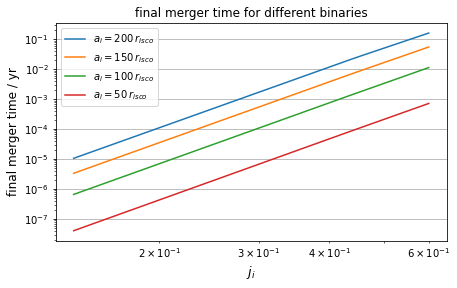

In [11]:
plt.figure(figsize=(7,4))
t_m_list= np.zeros(len(e0_list))
j_i_list= np.zeros(len(e0_list))


for i, a0 in enumerate (a0_list):
    for k, e0 in enumerate (e0_list):
        a0 = a0_list[i] * sp.r_isco()
        e_0 = e0_list[k] 
        j_i_list[k] = np.sqrt(1 - (e0**2))
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e_0,  a_fin = R_fin)
        t_m_list[k] = ev_ecc.t[-1]/ms.year_to_pc
     
    plt.loglog(j_i_list, t_m_list, '')
        
plt.legend(["$a_{i}=200 \hspace{0.2} r_{isco}$","$a_{i}=150 \hspace{0.2} r_{isco}$",
            "$a_{i}=100 \hspace{0.2} r_{isco}$","$a_{i}=50 \hspace{0.2} r_{isco}$"])
plt.xlabel('$j_{i}$', fontsize=13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('final merger time for different binaries')
plt.savefig('t_m vs j_i.pdf')
plt.grid()
plt.show()